In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sentiment Analysis
Credits to [Elena Katasonova](https://youtu.be/38d_JcyMFnE) and [course](https://github.com/hse-ds/iad-intro-ds/blob/master/2023/seminars/sem11_texts/sem11_texts.ipynb)

Today we will work with dataset of tweets on Portuguese: https://www.kaggle.com/datasets/augustop/portuguese-tweets-for-sentiment-analysis And we will classify the emotions of the posts.

In [3]:
!kaggle datasets download -d augustop/portuguese-tweets-for-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/augustop/portuguese-tweets-for-sentiment-analysis
License(s): CC-BY-NC-SA-4.0
 97% 218M/224M [00:03<00:00, 75.1MB/s]
100% 224M/224M [00:03<00:00, 73.0MB/s]


In [4]:
!unzip portuguese-tweets-for-sentiment-analysis.zip

Archive:  portuguese-tweets-for-sentiment-analysis.zip
  inflating: NoThemeTweets.csv       
  inflating: TestDatasets/Test.csv   
  inflating: TestDatasets/Test3classes.csv  
  inflating: TestDatasets/TestTema.csv  
  inflating: TrainingDatasets/Train100.csv  
  inflating: TrainingDatasets/Train200.csv  
  inflating: TrainingDatasets/Train300.csv  
  inflating: TrainingDatasets/Train3Classes.csv  
  inflating: TrainingDatasets/Train400.csv  
  inflating: TrainingDatasets/Train50.csv  
  inflating: TrainingDatasets/Train500.csv  
  inflating: TrainingDatasets/TrainTema.csv  
  inflating: TweetsNeutralHash.csv   
  inflating: TweetsNeutralNews.csv   
  inflating: TweetsWithTheme.csv     
  inflating: testdatasets/Test.csv   
  inflating: testdatasets/Test3classes.csv  
  inflating: testdatasets/TestTema.csv  
  inflating: trainingdatasets/Train100.csv  
  inflating: trainingdatasets/Train200.csv  
  inflating: trainingdatasets/Train300.csv  
  inflating: trainingdatasets/Train3Classes.c

In [5]:
data =  pd.read_csv('NoThemeTweets.csv')

In [6]:
data.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:)
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:)
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:)
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:)
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:)


In [7]:
data.isnull().sum()

,0
id,0
tweet_text,0
tweet_date,0
sentiment,0
query_used,0


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.tweet_text, data.sentiment, test_size=0.5, random_state=42)

In [9]:
X_train.shape

(392907,)

## Initial text preprocessing
Tokenizing

Lematizing/Stemming

Stop-words/Puntuation

Vectorizing (Bag-of-Words/TF-IDF)

In [10]:
import nltk

In [11]:
from nltk.tokenize import word_tokenize

In [14]:
phrase = "He doesn't want to fix it :("

In [15]:
phrase.split()

['He', "doesn't", 'want', 'to', 'fix', 'it', ':(']

In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
word_tokenize(phrase)

['He', 'does', "n't", 'want', 'to', 'fix', 'it', ':', '(']

In [20]:
from nltk import tokenize
dir(tokenize)[5:20]

['PunktSentenceTokenizer',
 'PunktTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer',
 'TreebankWordDetokenizer',
 'TreebankWordTokenizer',
 'TweetTokenizer',
 'WhitespaceTokenizer']

In [21]:
list(tokenize.WhitespaceTokenizer().span_tokenize(phrase))

[(0, 2), (3, 10), (11, 15), (16, 18), (19, 22), (23, 25), (26, 28)]

In [22]:
tokenize.TreebankWordTokenizer().tokenize(phrase)

['He', 'does', "n't", 'want', 'to', 'fix', 'it', ':', '(']

In [23]:
from nltk.tokenize import TweetTokenizer
tw = TweetTokenizer()
tw.tokenize(phrase)

['He', "doesn't", 'want', 'to', 'fix', 'it', ':(']

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords

In [26]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
from string import punctuation

In [28]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
from nltk.stem import SnowballStemmer

In [30]:
stemmer = SnowballStemmer('english')

In [31]:
print([stemmer.stem(a) for a in word_tokenize(phrase)])

['he', 'doe', "n't", 'want', 'to', 'fix', 'it', ':', '(']


In [32]:
phrase_1 = "In my younger and more vulnerable years my father gave me some advice that   \
      I've been turning over in my mind ever since. \"Whenever you feel like criticizing any one,\" he told me,   \
      \"just remember that all the people in this world haven't had the advantages that you've had.\""

In [34]:
print([stemmer.stem(a) for a in word_tokenize(phrase_1)])

['in', 'my', 'younger', 'and', 'more', 'vulner', 'year', 'my', 'father', 'gave', 'me', 'some', 'advic', 'that', 'i', 've', 'been', 'turn', 'over', 'in', 'my', 'mind', 'ever', 'sinc', '.', '``', 'whenev', 'you', 'feel', 'like', 'critic', 'ani', 'one', ',', "''", 'he', 'told', 'me', ',', '``', 'just', 'rememb', 'that', 'all', 'the', 'peopl', 'in', 'this', 'world', 'have', "n't", 'had', 'the', 'advantag', 'that', 'you', 've', 'had', '.', "''"]


Mystem & Pymorphy

# Bag-of-Words and TF-IDF

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
texts = ['I like my cat.', 'My cat is the most perfect cat.', 'is this cat or is this bread?']

In [37]:
texts_tokenized = [' '.join([w for w in word_tokenize(t) if w.isalpha()]) for t in texts]
texts_tokenized

['I like my cat',
 'My cat is the most perfect cat',
 'is this cat or is this bread']

In [38]:
countv = CountVectorizer()

In [39]:
X = countv.fit_transform(texts_tokenized)

In [40]:
countv.get_feature_names_out()

array(['bread', 'cat', 'is', 'like', 'most', 'my', 'or', 'perfect', 'the',
       'this'], dtype=object)

In [41]:
X.toarray()

array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 2, 1, 0, 1, 1, 0, 1, 1, 0],
       [1, 1, 2, 0, 0, 0, 1, 0, 0, 2]])

In [42]:
pd.DataFrame(X.toarray(), columns=countv.get_feature_names_out())

,bread,cat,is,like,most,my,or,perfect,the,this
0,0,1,0,1,0,1,0,0,0,0
1,0,2,1,0,1,1,0,1,1,0
2,1,1,2,0,0,0,1,0,0,2


Term Frequency in the document $d$:
$$
TF(t,\ d) = \frac{\text{Count of } t \text{ in } d}{|d|}
$$
Inverse Document Frequency:
$$
IDF(t,\ D) = \log\frac{|D|}{\text{#documents containing word } t}
$$

\

$$
\text{TF-IDF}(t,\ d,\ D) = TF(t,\ d)\times IDF(t,\ D)
$$

If word $t$ is in every document, then TF-IDF=0.

In [43]:
#type(data.iloc[76,0])
#countv.transform(data.iloc[76:77,0]).toarray()
#countv.get_feature_names_out()
#X = countv.transform(data.text)

# n-Gramms

In [44]:
from nltk import ngrams

In [45]:
list(ngrams(word_tokenize(phrase), 1))

[('He',),
 ('does',),
 ("n't",),
 ('want',),
 ('to',),
 ('fix',),
 ('it',),
 (':',),
 ('(',)]

In [46]:
list(ngrams(word_tokenize(phrase), 2))

[('He', 'does'),
 ('does', "n't"),
 ("n't", 'want'),
 ('want', 'to'),
 ('to', 'fix'),
 ('fix', 'it'),
 ('it', ':'),
 (':', '(')]

#Create Bag-of-Words

In [47]:
vec = CountVectorizer(ngram_range=(1,1)) #tokenizer=word_tokenize),  analyzer='char',

In [48]:
X_train_transformed = vec.fit_transform(X_train)
X_test_transformed = vec.transform(X_test)

In [49]:
list(vec.vocabulary_.items())[:10]

[('nivbrito', 239939),
 ('gt', 148395),
 ('até', 51362),
 ('parece', 253449),
 ('vc', 329352),
 ('fica', 130926),
 ('feia', 128852),
 ('heloisabecker_', 154320),
 ('ei', 114145),
 ('não', 243533)]

In [50]:
from sklearn.preprocessing import MaxAbsScaler

In [66]:
sc = MaxAbsScaler()
X_train_transformed = sc.fit_transform(X_train_transformed)
X_test_transformed = sc.transform(X_test_transformed)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf = LogisticRegression(max_iter=200, random_state=42)

In [69]:
clf.fit(X_train_transformed,y_train)

LogisticRegression(max_iter=200, random_state=42)

In [70]:
y_pred = clf.predict(X_test_transformed)

In [71]:
#y_pred_proba = clf.predict_proba(X_test_transformed)

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negativo       0.82      0.91      0.86    261322
    Positivo       0.77      0.59      0.67    131585

    accuracy                           0.80    392907
   macro avg       0.79      0.75      0.77    392907
weighted avg       0.80      0.80      0.80    392907



In [74]:
#clf.coef_.argsort()[:10]

In [75]:
for a in vec.get_feature_names_out()[clf.coef_.argsort()].ravel()[-25:]:
  print(a)

quiser
dizer
nada
lt
vale
frases
parabéns
vlw
melhor
segui
siga
adoro
olá
brigada
obg
adivinhem
legal
felicidades
foo
valeu
bom
boa
obrigada
obrigado
feliz


In [76]:
import matplotlib.pyplot as plt

In [77]:
import numpy as np

In [78]:
def visualize(clf, feature_names, n_features=25):
  coef = clf.coef_.ravel()
  positive_coef = np.argsort(coef)[-n_features:]
  negative_coef = np.argsort(coef)[:n_features]
  all_coefs = np.hstack([negative_coef, positive_coef])

  plt.figure(figsize=(15,5))
  colors = ['red' if c<0 else 'blue' for c in coef[all_coefs]]
  plt.bar(np.arange(2*n_features), coef[all_coefs], color=colors)
  feature_names = np.array(feature_names)
  plt.xticks(np.arange(1,1+2*n_features), feature_names[all_coefs], rotation =60, ha='right')

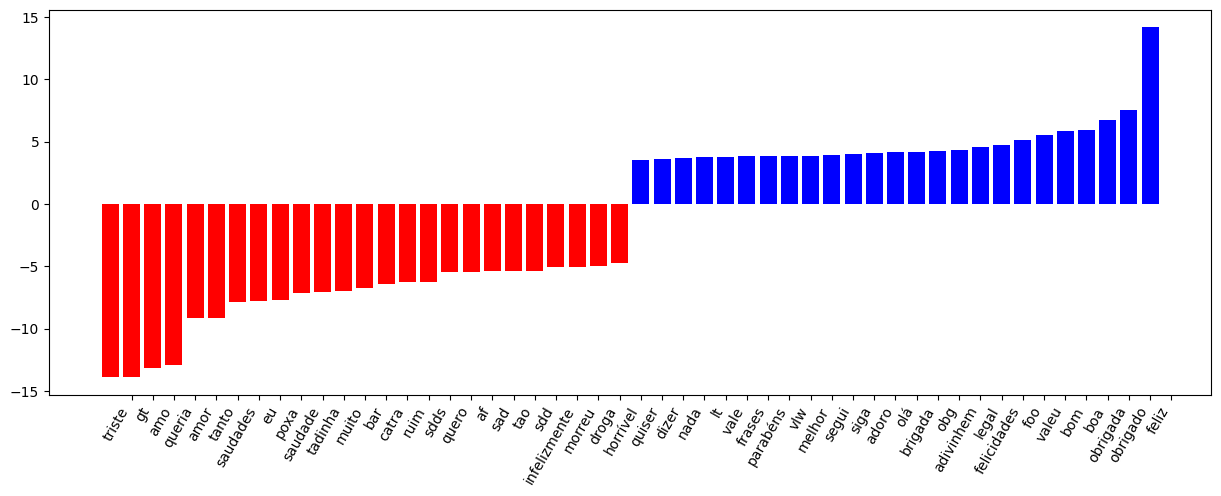

In [79]:
visualize(clf, vec.get_feature_names_out())

##Let's keep the punctuation

In [93]:
vec = CountVectorizer(ngram_range=(1,1), tokenizer=word_tokenize,  analyzer='char')

In [94]:
X_train_transformed = vec.fit_transform(X_train)
X_test_transformed = vec.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [95]:
#list(vec.vocabulary_.items())[:10]

In [96]:
#from sklearn.preprocessing import MaxAbsScaler

In [97]:
#sc = MaxAbsScaler()
X_train_transformed = sc.fit_transform(X_train_transformed)
X_test_transformed = sc.transform(X_test_transformed)

In [98]:
clf = LogisticRegression(max_iter=200, random_state=42)

In [99]:
clf.fit(X_train_transformed,y_train)

LogisticRegression(max_iter=200, random_state=42)

In [100]:
y_pred = clf.predict(X_test_transformed)

In [101]:
#y_pred_proba = clf.predict_proba(X_test_transformed)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negativo       0.96      1.00      0.98    261322
    Positivo       1.00      0.92      0.96    131585

    accuracy                           0.97    392907
   macro avg       0.98      0.96      0.97    392907
weighted avg       0.97      0.97      0.97    392907



In [103]:
#clf.coef_.argsort()[:10]

In [104]:
#for a in vec.get_feature_names_out()[clf.coef_.argsort()].ravel()[-25:]:
#  print(a)

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129319 (\N{SNEEZING FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128158 (\N{REVOLVING HEARTS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128147 (\N{BEATING HEART}) missing from font(s) DejaVu 

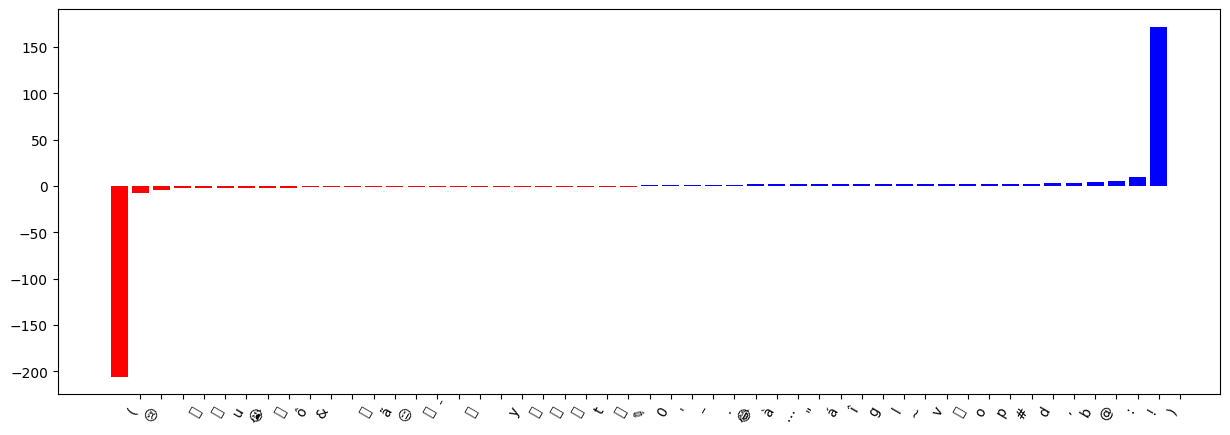

In [105]:
visualize(clf, vec.get_feature_names_out())

# Using 3-gramms

In [108]:
vec = CountVectorizer(ngram_range=(3,3), tokenizer=word_tokenize,  analyzer='char')

In [109]:
X_train_transformed = vec.fit_transform(X_train)
X_test_transformed = vec.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [110]:
#list(vec.vocabulary_.items())[:10]

In [111]:
#from sklearn.preprocessing import MaxAbsScaler

In [112]:
#sc = MaxAbsScaler()
X_train_transformed = sc.fit_transform(X_train_transformed)
X_test_transformed = sc.transform(X_test_transformed)

In [113]:
clf = LogisticRegression(max_iter=200, random_state=42)

In [114]:
clf.fit(X_train_transformed,y_train)

LogisticRegression(max_iter=200, random_state=42)

In [115]:
y_pred = clf.predict(X_test_transformed)

In [116]:
#y_pred_proba = clf.predict_proba(X_test_transformed)

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00    261322
    Positivo       1.00      1.00      1.00    131585

    accuracy                           1.00    392907
   macro avg       1.00      1.00      1.00    392907
weighted avg       1.00      1.00      1.00    392907



In [118]:
len(clf.coef_[0]) # .argsort()[:10]

105767

In [119]:
X_train_transformed.shape

(392907, 105767)

In [120]:
#for a in vec.get_feature_names_out()[clf.coef_.argsort()].ravel()[-25:]:
#  print(a)

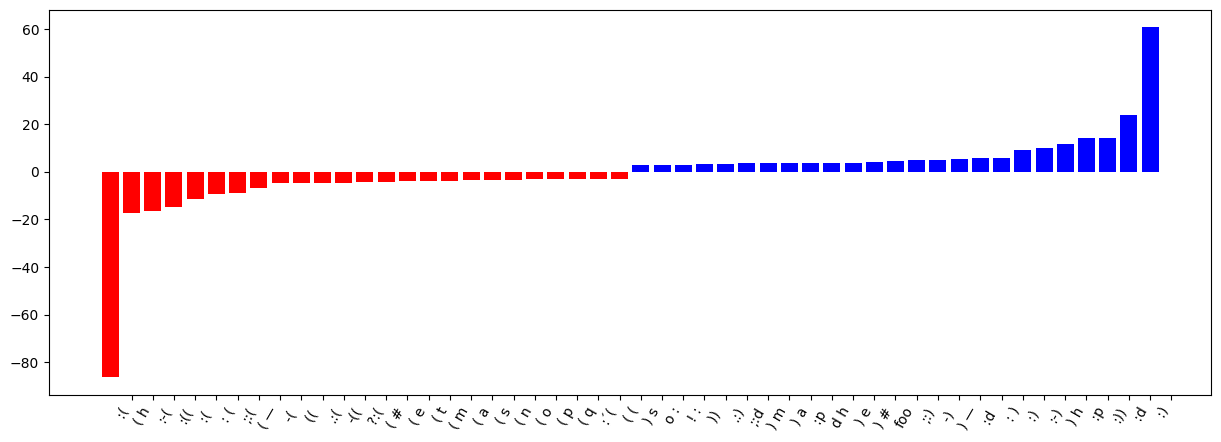

In [121]:
visualize(clf, vec.get_feature_names_out())

#Count characters

In [ ]:
vec = CountVectorizer(ngram_range=(1,2),   analyzer='char')

In [ ]:
X_train_transformed = vec.fit_transform(X_train)
X_test_transformed = vec.transform(X_test)

In [ ]:
#list(vec.vocabulary_.items())[:10]

In [ ]:
#from sklearn.preprocessing import MaxAbsScaler

In [ ]:
#sc = MaxAbsScaler()
X_train_transformed = sc.fit_transform(X_train_transformed)
X_test_transformed = sc.transform(X_test_transformed)

In [ ]:
clf = LogisticRegression(max_iter=200, random_state=42)

In [ ]:
clf.fit(X_train_transformed,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

In [ ]:
y_pred = clf.predict(X_test_transformed)

In [ ]:
#y_pred_proba = clf.predict_proba(X_test_transformed)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00    261322
    Positivo       1.00      1.00      1.00    131585

    accuracy                           1.00    392907
   macro avg       1.00      1.00      1.00    392907
weighted avg       1.00      1.00      1.00    392907



In [ ]:
#clf.coef_.argsort()[:10]

In [ ]:
#for a in vec.get_feature_names_out()[clf.coef_.argsort()].ravel()[-25:]:
#  print(a)

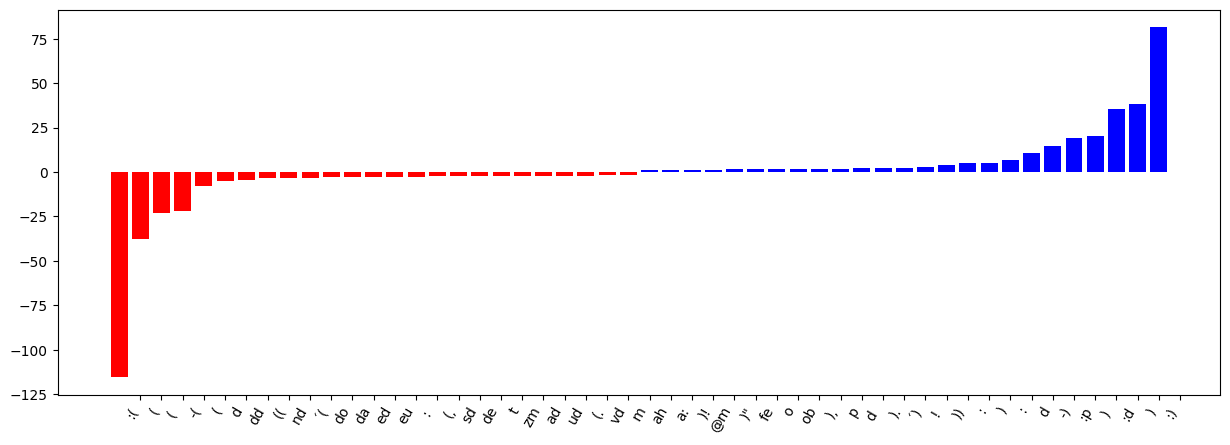

In [ ]:
visualize(clf, vec.get_feature_names_out())

#Classification with one feature

In [ ]:
pred = ['Positivo' if ')' in tweet else 'Negativo' for tweet in X_test] #SentimentText]
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    Negativo       0.92      0.99      0.95    261322
    Positivo       0.97      0.83      0.90    131585

    accuracy                           0.94    392907
   macro avg       0.95      0.91      0.93    392907
weighted avg       0.94      0.94      0.94    392907



## Regular Expressions

https://regex101.com/

In [ ]:
import re

In [ ]:
def custom_tokenizer(text):
    # Define a regular expression pattern to match emoticons
    emoticon_pattern =  r'(?::|;|=)(?:-)?(?:\)|\(|D|P)0[]o' #r'\b\w+\b|[.,!?;()-]'

    # Tokenize the text using a word tokenizer and preserve emoticons
    tokens = re.findall(r'\b\w+\b|{}'.format(emoticon_pattern), text)

    return tokens

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
tk = TweetTokenizer()